# Make sentiment plot for a given speach

In [19]:
#open txt file
speakers = []
text = []
lines = []
line_speaker = []

with open('Speaches\presidential_debate.txt', 'r') as file:
    for line in file:
        #find text until first colon
        if ':' in line:
            speaker  = line.split(':')[0]

            line_filtered = []
            
            for word in line.split(':')[1:][0].split():
                
                if word != '':
                    speakers.append(speaker)
                    #remove all non-alphabetic characters
                    word = ''.join(e for e in word.lower() if e.isalnum())
                    text.append(word)
                    line_filtered.append(word)

            lines.append(line_filtered)
            line_speaker.append(speaker)

print(set(speakers))

assert len(speakers) == len(text)
assert len (lines) == len(line_speaker)

print(text)

{'VICE PRESIDENT KAMALA HARRIS', 'FORMER PRESIDENT DONALD TRUMP', 'DAVID MUIR', 'LINSEY DAVIS'}
['tonight', 'the', 'highstakes', 'showdown', 'here', 'in', 'philadelphia', 'between', 'vice', 'president', 'kamala', 'harris', 'and', 'former', 'president', 'donald', 'trump', 'their', 'first', 'facetoface', 'meeting', 'in', 'this', 'presidential', 'election', 'their', 'first', 'facetoface', 'meeting', 'ever', 'a', 'historic', 'race', 'for', 'president', 'upended', 'just', 'weeks', 'ago', 'president', 'biden', 'withdrawing', 'after', 'his', 'last', 'debate', 'donald', 'trump', 'is', 'now', 'up', 'against', 'a', 'new', 'opponent', 'the', 'candidates', 'separated', 'by', 'the', 'smallest', 'of', 'margins', 'essentially', 'tied', 'in', 'the', 'polls', 'nationally', 'and', 'in', 'the', 'key', 'battlegrounds', 'including', 'right', 'here', 'in', 'pennsylvania', 'all', 'still', 'very', 'much', 'in', 'play', 'the', 'abc', 'news', 'presidential', 'debate', 'starts', 'right', 'now', 'good', 'evening'

In [20]:
print("Number of words spoken by Trump", sum([1 for speaker in speakers if speaker == "FORMER PRESIDENT DONALD TRUMP"]))
print("Number of words spoken by Harris", sum([1 for speaker in speakers if speaker == "VICE PRESIDENT KAMALA HARRIS"]))


Number of words spoken by Trump 8046
Number of words spoken by Harris 5893


In [21]:
#read sentiment file to dict
LabMT = {}
with open("sentiment.txt") as f:
    #skip the first 5 lines
    for _ in range(4):
        next(f)
    for line in f:
            line = line.strip().split("\t")
            word = line[0]

            LabMT[word] = [None if v == "--" else float(v) for v in line[1:]]

In [22]:
#look up the sentiment for each word in the text
sentiments = [LabMT[word][1] if word in LabMT else 0 for word in text]

print(len(sentiments))

16963


In [23]:
#make a dict to map eahc speaker to a color
speaker_colors = {  'FORMER PRESIDENT DONALD TRUMP': 'red', 
                    'DAVID MUIR': "lightgrey",
                    'VICE PRESIDENT KAMALA HARRIS': 'blue',
                    'LINSEY DAVIS': "lightgrey"}


In [24]:
sentiments_lines = [[LabMT[word][1] if word in LabMT else 0 for word in line] for line in lines]

mean_lines = [sum(line) / len(line) for line in sentiments_lines]

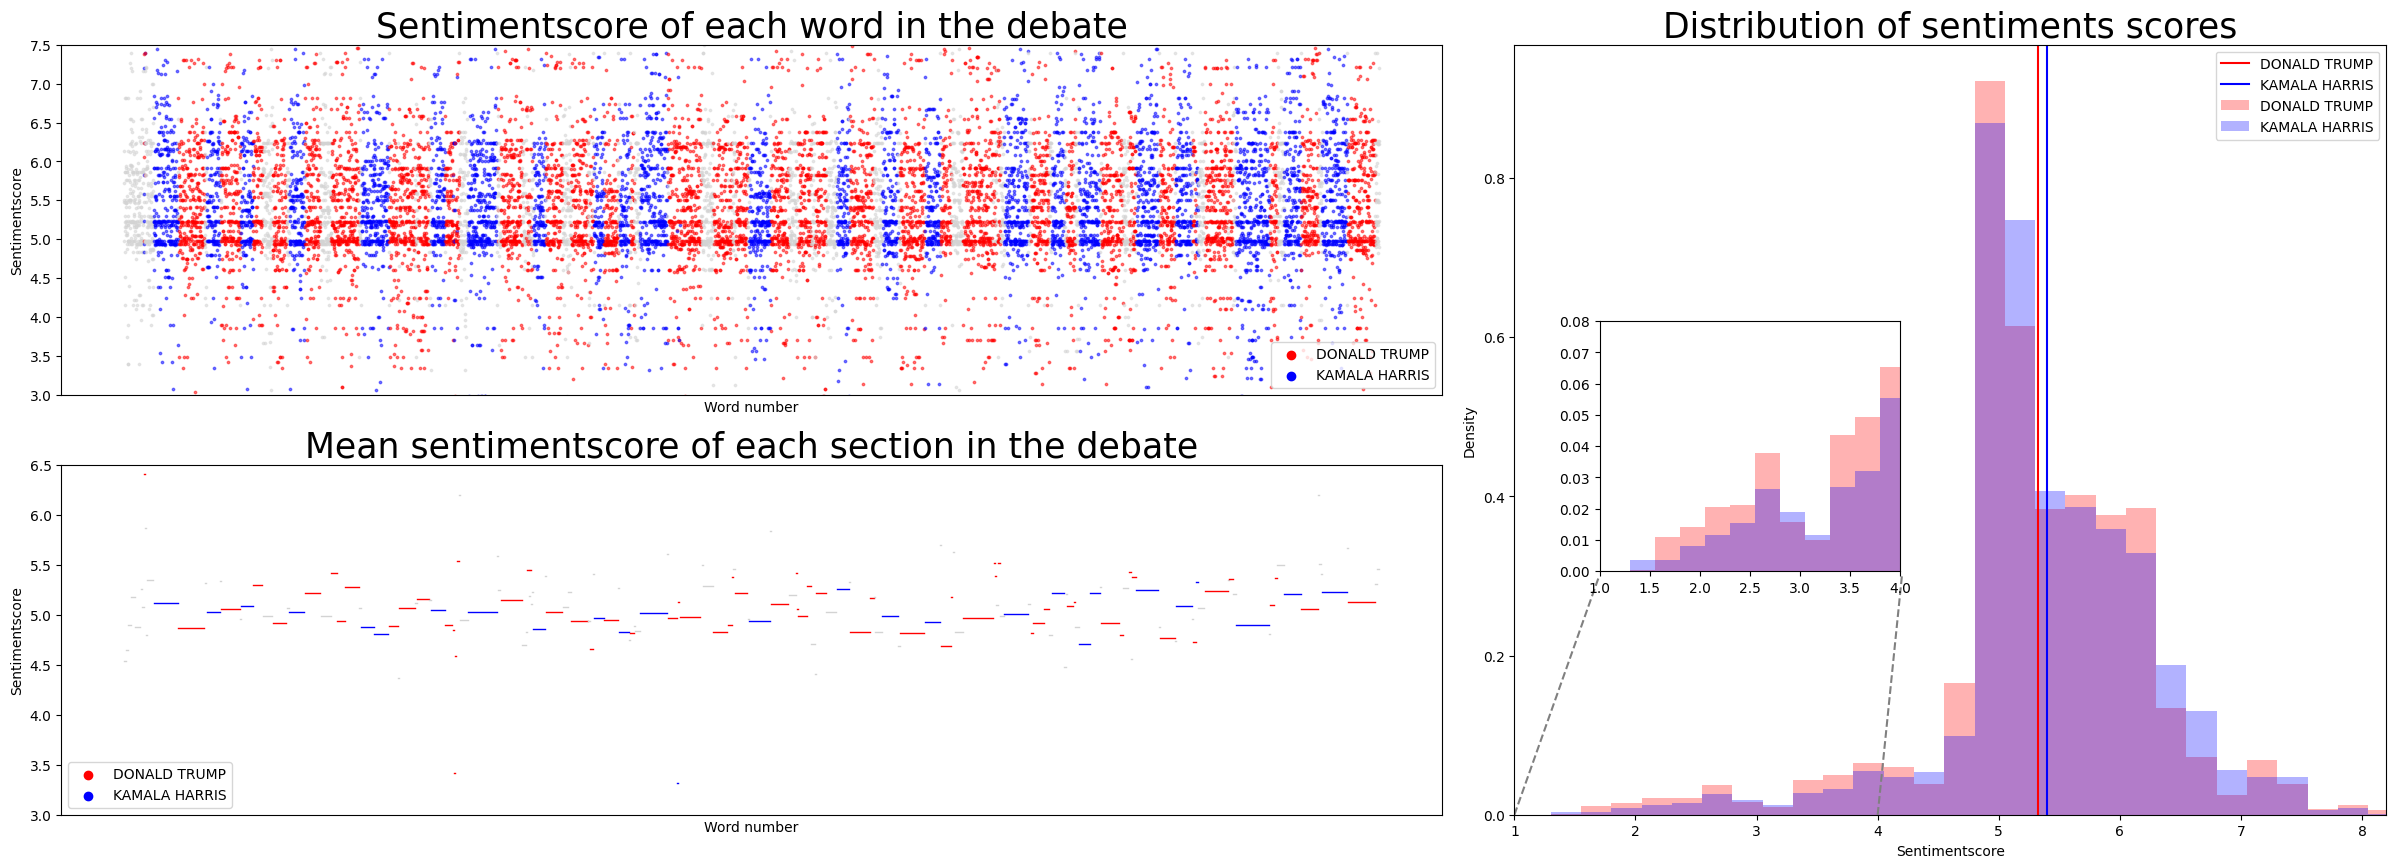

In [31]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import numpy as np

# -------------------------------------Create figure layout--------------------------------------
fig = plt.figure(figsize=(30, 10))

# Create a GridSpec layout
gs = GridSpec(2, 3, figure=fig, width_ratios=[3, 3, 4], height_ratios=[1, 1], wspace=0.1, hspace=0.2)

# Add subplots
ax1 = fig.add_subplot(gs[0, 0:2])  # Top-left wide subplot spanning 2 columns
ax2 = fig.add_subplot(gs[1, 0:2])  # Bottom-left wide subplot spanning 2 columns
ax3 = fig.add_subplot(gs[:, 2])    # Right subplot spanning 2 rows

#----------------------------------------------AX1----------------------------------------------
#plot the sentiments where each point has the color according to the speaker
n = len(speakers)
for i in range(n):
    if sentiments[i] != 0:
        ax1.scatter(i, sentiments[i], color=speaker_colors[speakers[i]], alpha=0.5, s=3)

ax1.set_title("Sentimentscore of each word in the debate")
ax1.title.set_fontsize(25)

ax1.set_xlabel("Word number")
ax1.set_ylabel("Sentimentscore")
ax1.set_xticks([])

#add a ledgend for trumps and harris color
ax1.scatter([], [], color=speaker_colors["FORMER PRESIDENT DONALD TRUMP"], label= "DONALD TRUMP")
ax1.scatter([], [], color=speaker_colors["VICE PRESIDENT KAMALA HARRIS"], label= "KAMALA HARRIS")
ax1.set_ylim(3, 7.5)
ax1.legend()

#----------------------------------------------AX1---------------------------------------------
word_count = 0
for i in range(len(sentiments_lines)):
    
    #plot vertical line from word_count to word_count + len(sentiments_lines[i]) with the mean sentiment for that line
    ax2.plot([word_count+1, word_count + len(sentiments_lines[i])-1], [mean_lines[i], mean_lines[i]], color=speaker_colors[line_speaker[i]], linewidth=1)
    
    word_count += len(sentiments_lines[i])


ax2.set_title("Mean sentimentscore of each section in the debate")
ax2.title.set_fontsize(25)
ax2.set_xlabel("Word number")
ax2.set_ylabel("Sentimentscore")
ax2.set_xticks([])
ax2.set_ylim(3, 6.5)

#add a ledgend for trumps and harris color
ax2.scatter([], [], color=speaker_colors["FORMER PRESIDENT DONALD TRUMP"], label= "DONALD TRUMP")
ax2.scatter([], [], color=speaker_colors["VICE PRESIDENT KAMALA HARRIS"], label= "KAMALA HARRIS")
ax2.legend()

#----------------------------------------------AX3----------------------------------------------
#find the index of where speacker is Former President Donald Trump
trump = [sentiments[i]  for i in range(len(speakers)) if speakers[i] == 'FORMER PRESIDENT DONALD TRUMP' and sentiments[i] != 0]
harris = [sentiments[i]  for i in range(len(speakers)) if speakers[i] == 'VICE PRESIDENT KAMALA HARRIS' and sentiments[i] != 0]

#make histogram of the sentiments
#make line for average sentiment
ax3.axvline(x=sum(trump)/len(trump), color='red', label="DONALD TRUMP")
ax3.axvline(x=sum(harris)/len(harris), color='blue', label="KAMALA HARRIS")

#bins
min_val = min(np.array(trump).min(), np.array(harris).min())
max_val = max(np.array(trump).max(), np.array(harris).max())

# Define bins
bin_width = 0.25  # Adjust this as needed
bins = np.arange(min_val, max_val + bin_width, bin_width)

ax3.hist(trump, bins=bins, color='red', alpha=0.3, label="DONALD TRUMP", density=True)
ax3.hist(harris, bins=bins, color='blue', alpha=0.3, label="KAMALA HARRIS", density=True)
ax3.legend()
ax3.set_title("Distribution of sentiments scores")
ax3.title.set_fontsize(25)
ax3.set_xlabel("Sentimentscore")
ax3.set_ylabel("Density")
ax3.set_xlim(1, 8.2)

#----------------------------------------------Ins_ax----------------------------------------------
#insert subplot
ins_ax = inset_axes(ax3, width=3, height=2.5,
          bbox_transform=ax3.transAxes, bbox_to_anchor=(0.45,0.65),)

threshold = 4

ins_ax.hist(trump, bins=bins, color='red', alpha=0.3, label="DONALD TRUMP", density=True)
ins_ax.hist(harris, bins=bins, color='blue', alpha=0.3, label="KAMALA HARRIS", density=True)

ins_ax.set_xlim(1, threshold)
ins_ax.set_ylim(0, 0.08)

#add a line from (4,0) to (3.8,500) and (0,0) to (1.8,500)
ax3.plot([threshold, 4.2], [0, 0.3], color='grey', linestyle='dashed')
ax3.plot([1, 1.7], [0, 0.3], color='grey', linestyle='dashed')


plt.show()



In [26]:
threshold = 4
trump_lowsentimentwords = [text[i]  for i in range(len(speakers)) if speakers[i] == 'FORMER PRESIDENT DONALD TRUMP' and sentiments[i] != 0 and sentiments[i] < threshold]
harris_lowsentimentwords = [text[i]  for i in range(len(speakers)) if speakers[i] == 'VICE PRESIDENT KAMALA HARRIS' and sentiments[i] != 0 and sentiments[i] < threshold]

lowsentimentwords = [text[i]  for i in range(len(speakers)) if sentiments[i] != 0 and sentiments[i] < threshold]

print("Trump low sentiment words", len(trump_lowsentimentwords))
print("Harris low sentiment words", len(harris_lowsentimentwords))

print("Number of times Trump says the word: bad", sum([word == "bad" for word in trump_lowsentimentwords]))

Trump low sentiment words 520
Harris low sentiment words 286
Number of times Trump says the word: bad 13


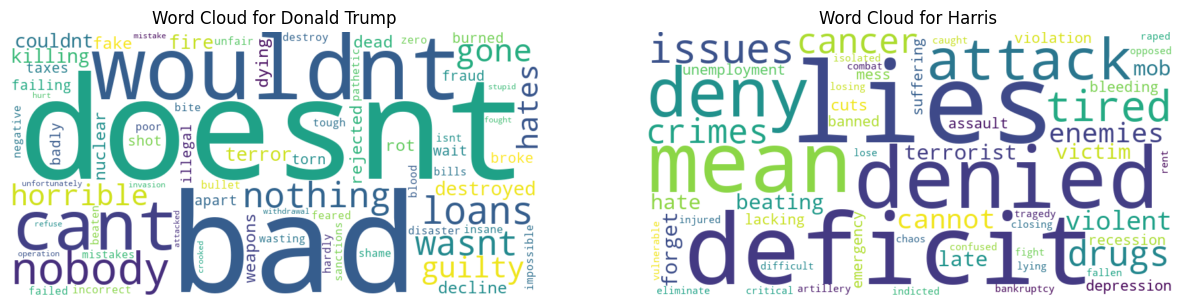

In [27]:
#make a dictioanry of the frecency of each word in text
import math
from wordcloud import WordCloud

#calculate idf scores
term_doc_count = {}

for word in set(trump_lowsentimentwords):
    term_doc_count[word] = 1

for word in set(harris_lowsentimentwords):
    if word in term_doc_count:
        term_doc_count[word] += 1
    else:
        term_doc_count[word] = 1

idf_scores = {term: math.log(2/ count) for term, count in term_doc_count.items()}

#calculate tfidf scores
tf_trump = {}

for word in trump_lowsentimentwords:
    if word in tf_trump:
        tf_trump[word] += 1
    else:
        tf_trump[word] = 1

tfidf_trump = {word: tf * idf_scores[word] for word, tf in tf_trump.items()}

tf_harris = {}
for word in harris_lowsentimentwords:
    if word in tf_harris:
        tf_harris[word] += 1/len(harris_lowsentimentwords)
    else:
        tf_harris[word] = 1/len(harris_lowsentimentwords)

tfidf_harris = {word: tf * idf_scores[word] for word, tf in tf_harris.items()}


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_trump)

#make a fig with two supplots
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

# plot wordcliud
axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')  
axs[0].set_title(f'Word Cloud for Donald Trump')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_harris)

axs[1].imshow(wordcloud, interpolation='bilinear')
axs[1].axis('off')  
axs[1].set_title(f'Word Cloud for Harris')


plt.show()  